In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **EDA**

In [14]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
titanic_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
titanic_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
titanic_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [12]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_num = titanic_df[['Age','Fare','SibSp','Parch']]
df_cat = titanic_df[['Survived','Pclass','Sex','Cabin','Embarked','Ticket']]


[]

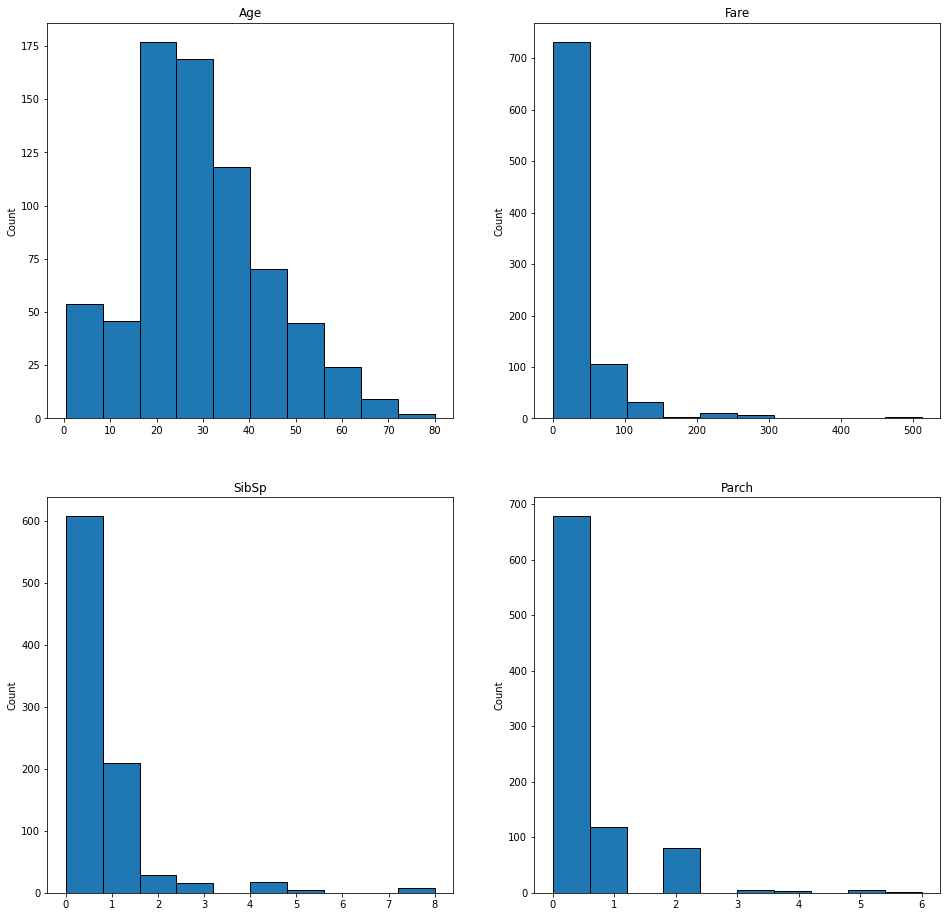

In [36]:


fig,axs = plt.subplots(2,2,figsize=(16,16))

axs[0,0].hist(df_num['Age'],edgecolor='black')
axs[0,0].set(title='Age',ylabel='Count')

axs[0,1].hist(df_num['Fare'],edgecolor='black')
axs[0,1].set(title='Fare',ylabel='Count')

axs[1,0].hist(df_num['SibSp'],edgecolor='black')
axs[1,0].set(title='SibSp',ylabel='Count')

axs[1,1].hist(df_num['Parch'],edgecolor='black')
axs[1,1].set(title='Parch',ylabel='Count')
plt.plot()

<AxesSubplot:xlabel='Parch', ylabel='Count'>

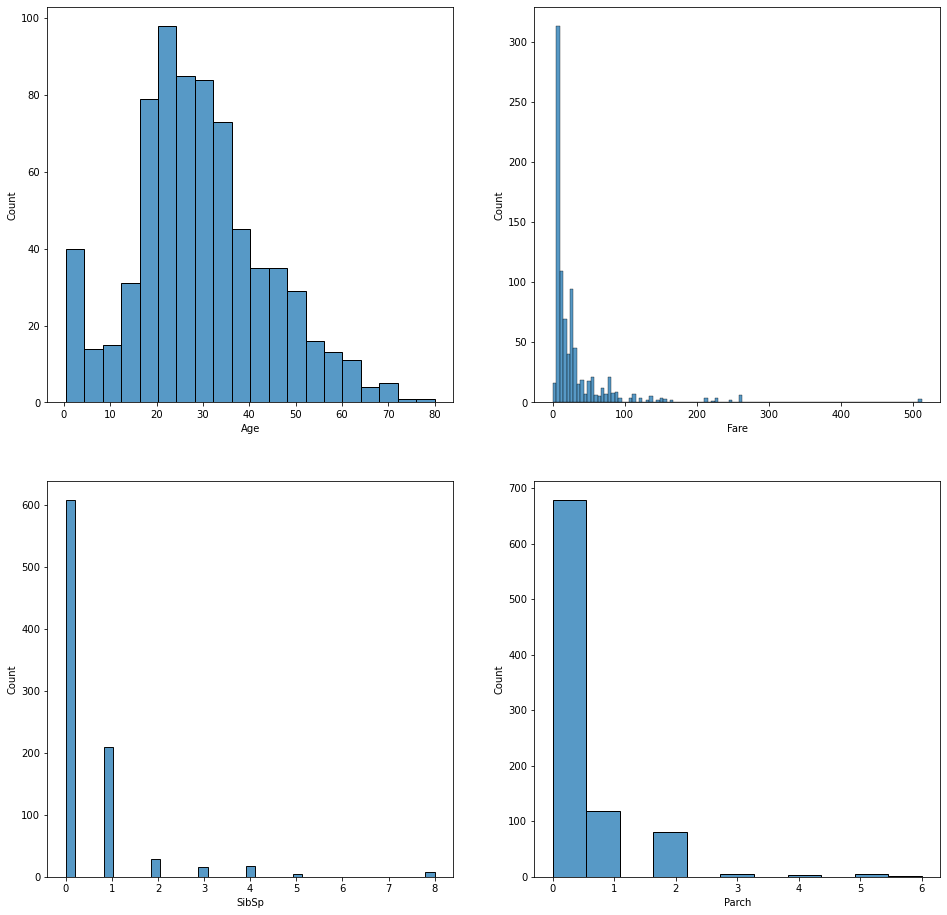

In [34]:
fig,axs1 = plt.subplots(2,2,figsize=(16,16))

sns.histplot(df_num['Age'],ax=axs1[0,0])
sns.histplot(df_num['Fare'],ax=axs1[0,1])
sns.histplot(df_num['SibSp'],ax=axs1[1,0])
sns.histplot(df_num['Parch'],ax=axs1[1,1])

<AxesSubplot:>

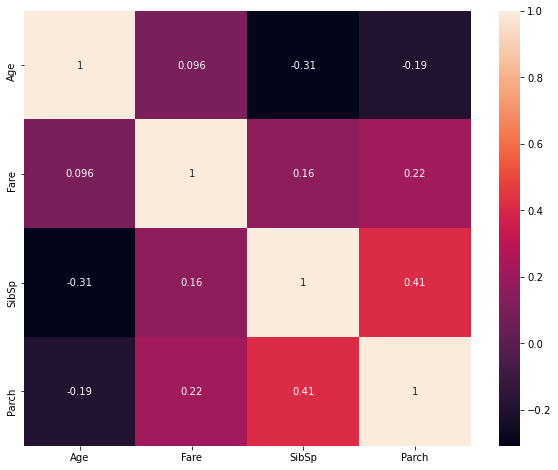

In [41]:
fig, axs = plt.subplots(figsize=(10,8))
sns.heatmap(df_num.corr(),ax=axs,annot=True)

In [43]:
pd.pivot_table(titanic_df,index='Survived',values=['Age','Fare','SibSp','Parch'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [47]:
df_cat.head()

,Survived,Pclass,Sex,Cabin,Embarked,Ticket
0,0,3,male,NaN,S,A/5 21171
1,1,1,female,C85,C,PC 17599
2,1,3,female,NaN,S,STON/O2. 3101282
3,1,1,female,C123,S,113803
4,0,3,male,NaN,S,373450


Text(0.5, 1.0, 'Embarked')

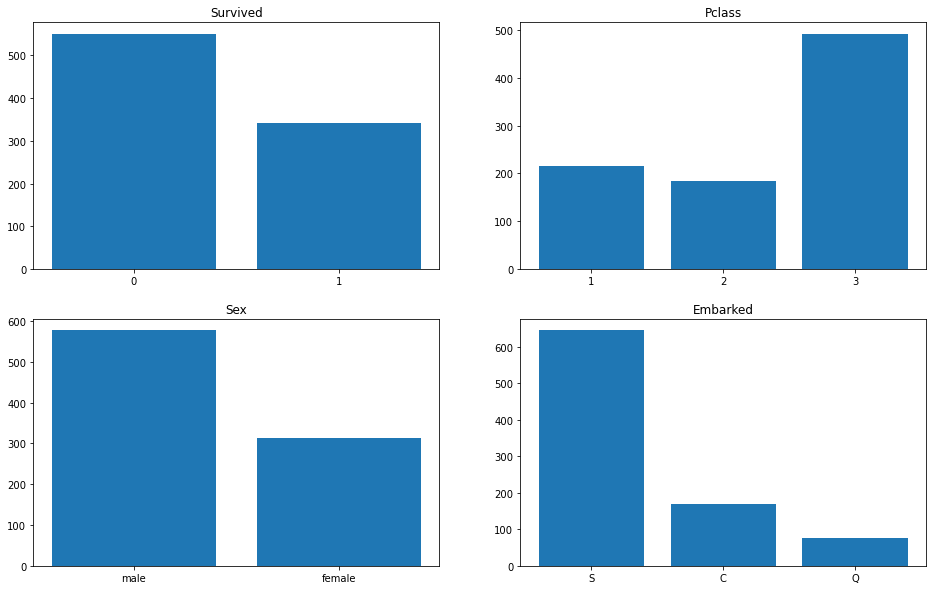

In [59]:
fig, axs = plt.subplots(2,2,figsize=(16,10))

axs[0,0].bar(df_cat['Survived'].value_counts().index,df_cat['Survived'].value_counts().values)
axs[0,0].set_xticks([0,1])
axs[0,0].set_title('Survived')

axs[0,1].bar(df_cat['Pclass'].value_counts().index,df_cat['Pclass'].value_counts().values)
axs[0,1].set_xticks([1,2,3])
axs[0,1].set_title('Pclass')

axs[1,0].bar(df_cat['Sex'].value_counts().index,df_cat['Sex'].value_counts().values)
#axs[1,0].set_xticks([0,1])
#axs[0,1].set_xticklabels([,1])
axs[1,0].set_title('Sex')

axs[1,1].bar(df_cat['Embarked'].value_counts().index,df_cat['Embarked'].value_counts().values)
#axs[1,0].set_xticks([0,1])
#axs[0,1].set_xticklabels([,1])
axs[1,1].set_title('Embarked')

[Text(0.5, 1.0, 'Ticket')]

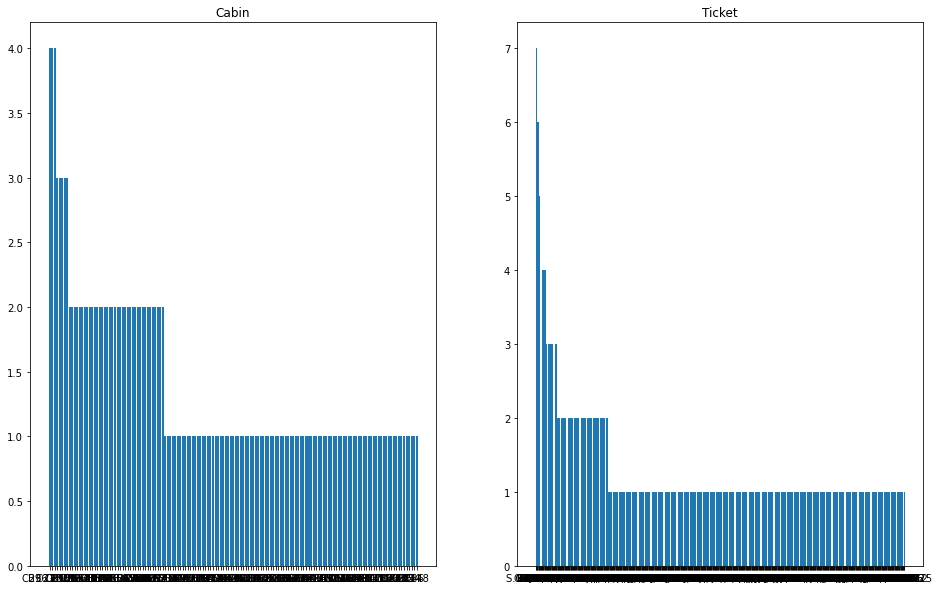

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,10))
ax1.bar(df_cat['Cabin'].value_counts().index,df_cat['Cabin'].value_counts())
ax1.set(title='Cabin')
ax2.bar(df_cat['Ticket'].value_counts().index,df_cat['Ticket'].value_counts())
ax2.set(title='Ticket')


/home/nik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


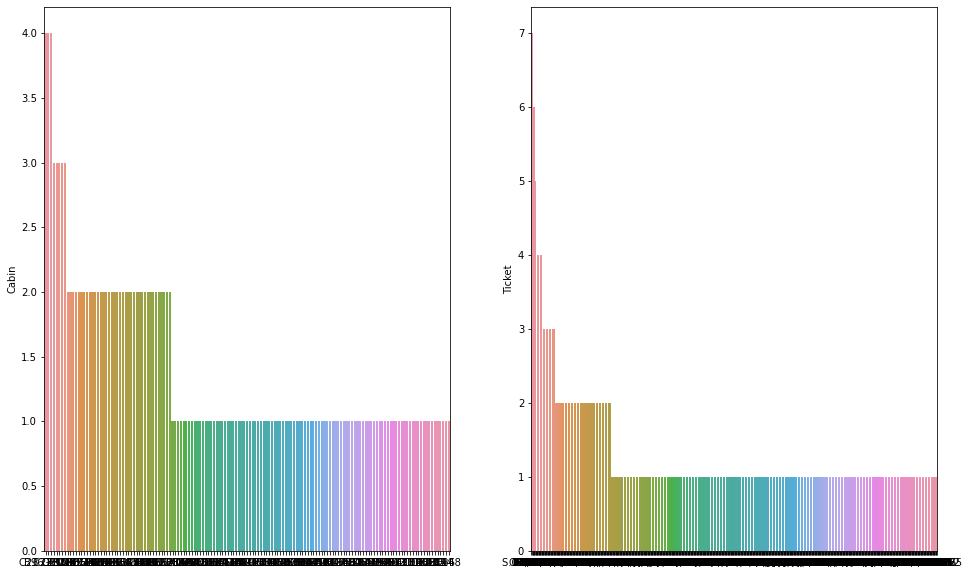

In [70]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,10))
sns.barplot(df_cat['Cabin'].value_counts().index,df_cat['Cabin'].value_counts(),ax=ax1)
sns.barplot(df_cat['Ticket'].value_counts().index,df_cat['Ticket'].value_counts(),ax=ax2)
plt.show()

/home/nik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nik/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/n

[Text(0.5, 1.0, 'Embarked')]

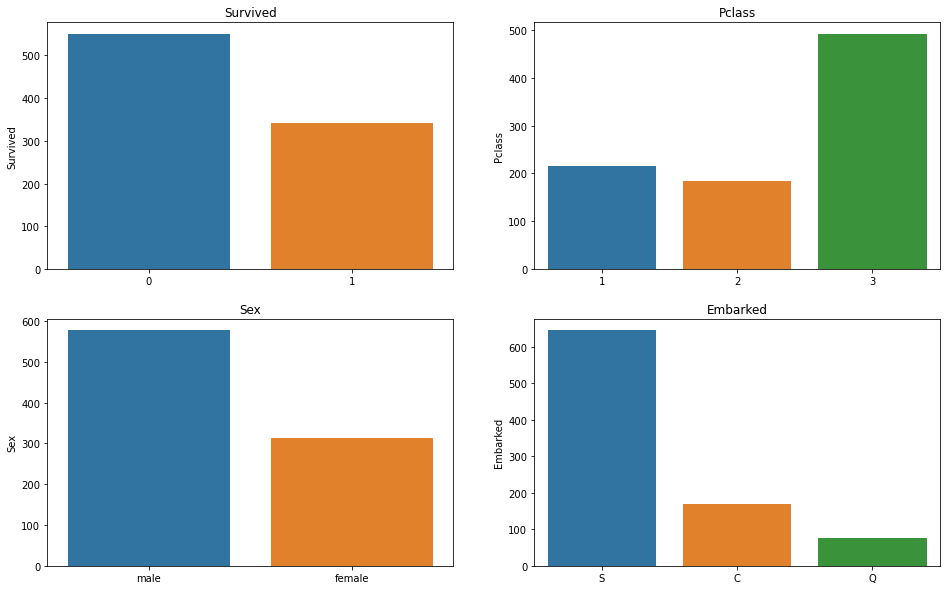

In [78]:
fig, axs = plt.subplots(2,2,figsize=(16,10))

sns.barplot(df_cat['Survived'].value_counts().index,df_cat['Survived'].value_counts(),ax=axs[0,0])
axs[0,0].set(title='Survived')

sns.barplot(df_cat['Pclass'].value_counts().index,df_cat['Pclass'].value_counts(),ax=axs[0,1])
axs[0,1].set(title='Pclass')

sns.barplot(df_cat['Sex'].value_counts().index,df_cat['Sex'].value_counts(),ax=axs[1,0])
axs[1,0].set(title='Sex')

sns.barplot(df_cat['Embarked'].value_counts().index,df_cat['Embarked'].value_counts(),ax=axs[1,1])
axs[1,1].set(title='Embarked')

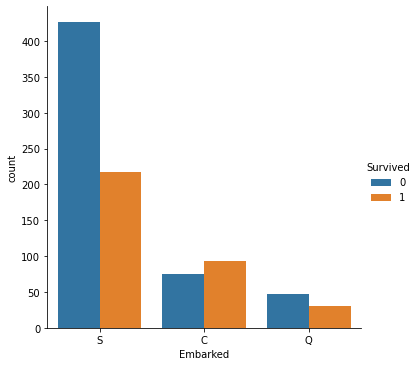

In [94]:


sns.catplot(data=df_cat,x='Embarked',hue='Survived',kind='count')


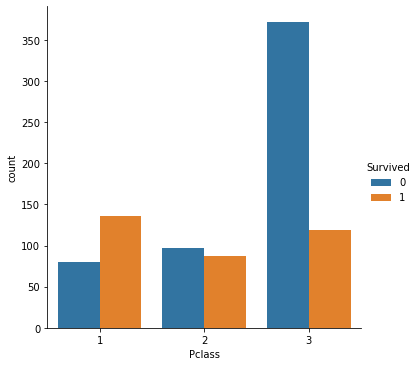

In [84]:
sns.catplot(data=df_cat,x='Pclass',hue='Survived',kind='count')
plt.show()

In [100]:
pd.pivot_table(titanic_df,index='Survived',columns='Pclass',values='Ticket',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [101]:
pd.pivot_table(titanic_df,index='Survived',columns='Sex',values='Ticket',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [102]:
pd.pivot_table(titanic_df,index='Survived',columns='Embarked',values='Ticket',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


## **Feature Engineering**

In [103]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
titanic_df['cabin_count'] = titanic_df['Cabin'].apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))

In [111]:
titanic_df['cabin_count'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_count, dtype: int64

In [117]:
pd.pivot_table(titanic_df,index='Survived',columns='cabin_count',values='Ticket',aggfunc='count').iloc[0:2,1:3]

cabin_count,1,2
Survived,,
0,58.0,7.0
1,122.0,9.0


In [116]:
pd.pivot_table(titanic_df,index='Survived',columns='cabin_count',values='Ticket',aggfunc='count')

cabin_count,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [122]:
titanic_df['cabin_mod'] = titanic_df['Cabin'].transform(lambda x : str(x)[0])

In [123]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,cabin_mod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C


In [124]:
pd.pivot_table(titanic_df,index='Survived',columns='cabin_mod',values='Ticket',aggfunc='count')

cabin_mod,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [126]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [127]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,cabin_mod,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,Mr


### Alternate way

In [128]:
def cleaner(text):

    clean = text.split(',')[1].split('.')[0].strip()
    return clean

In [131]:
titanic_df['Title2'] = titanic_df['Name'].transform(cleaner)

In [133]:
titanic_df.drop(columns=['Title1','Title2'],inplace=True)

In [134]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,cabin_mod,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C,Mr


### Null Value handling

In [135]:
pd.pivot_table(titanic_df,index='Survived',columns='Title',values='Ticket',aggfunc='count')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [171]:
titanic_tr = titanic_df.copy()

In [172]:
## NOTE : how to drop null values based on na in a particular column

titanic_tr.dropna(subset=['Embarked'],inplace=True)

In [173]:
titanic_tr.drop(columns=['Name','Ticket','Cabin','cabin_count'],inplace=True)

In [174]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_mod,Title
0,1,0,3,male,22.0,1,0,7.2500,S,n,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,n,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,n,Mr


In [175]:
titanic_tr[['Title','Sex','Age']].groupby(['Title','Sex']).mean()

Age
Title        Sex              
Capt         male    70.000000
Col          male    58.000000
Don          male    40.000000
Dr           female  49.000000
             male    40.600000
Jonkheer     male    38.000000
Lady         female  48.000000
Major        male    48.500000
Master       male     4.574167
Miss         female  21.662069
Mlle         female  24.000000
Mme          female  24.000000
Mr           male    32.368090
Mrs          female  35.654206
Ms           female  28.000000
Rev          male    43.166667
Sir          male    49.000000
the Countess female  33.000000

In [176]:
titanic_tr.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [178]:
titanic_tr['Age'] = titanic_tr[['Title','Sex','Age']].groupby(['Title','Sex']).transform(lambda grp:grp.fillna(round(grp.mean(),0)))

In [180]:
titanic_tr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
cabin_mod      0
Title          0
dtype: int64

### Categorical Encoding

In [182]:
titanic_tr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
cabin_mod       object
Title           object
dtype: object

In [187]:
titanic_tr = pd.concat([titanic_tr,pd.get_dummies(titanic_tr.Sex,drop_first=True)],axis=1)

In [189]:
titanic_tr = pd.concat([titanic_tr,pd.get_dummies(titanic_tr.Embarked,drop_first=True)],axis=1)

In [191]:
titanic_tr = pd.concat([titanic_tr,pd.get_dummies(titanic_tr.cabin_mod,drop_first=True)],axis=1)

In [193]:
titanic_tr = pd.concat([titanic_tr,pd.get_dummies(titanic_tr.Title,drop_first=True)],axis=1)

In [194]:
titanic_tr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_mod,Title,male,Q,S,B,C,D,E,F,G,T,n,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,male,22.0,1,0,7.2500,S,n,Mr,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,n,Miss,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mrs,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,n,Mr,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,n,Rev,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
887,888,1,1,female,19.0,0,0,30.0000,S,B,Miss,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
888,889,0,3,female,22.0,1,2,23.4500,S,n,Miss,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
889,890,1,1,male,26.0,0,0,30.0000,C,C,Mr,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [195]:
titanic_tr.drop(columns=['Sex','Embarked','cabin_mod','Title'],inplace=True)
titanic_tr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,B,C,D,E,F,G,T,n,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
887,888,1,1,19.0,0,0,30.0000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
888,889,0,3,22.0,1,2,23.4500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
titanic_tr = pd.concat([titanic_tr,pd.get_dummies(titanic_tr.Pclass,drop_first=True)],axis=1)


In [200]:
titanic_tr.drop(columns=['PassengerId'],inplace=True)
titanic_tr.drop(columns=['Pclass'],inplace=True)
titanic_tr

,Survived,Age,SibSp,Parch,Fare,male,Q,S,B,C,D,E,F,G,T,n,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
888,0,22.0,1,2,23.4500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Modelling

In [201]:
X_train = titanic_tr.iloc[:,1:].values
y_train = titanic_tr.iloc[:,0].values

In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [209]:
logit_model = LogisticRegression(max_iter=2000)
cv = cross_val_score(logit_model,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.82022472 0.80337079 0.8258427  0.86440678]
0.8279375357074844


In [214]:
rdforest_model = RandomForestClassifier()
cv = cross_val_score(rdforest_model,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.78089888 0.83146067 0.76966292 0.84180791]
0.8054402336062972


In [217]:
sv_model = SVC(probability=True)
cv = cross_val_score(sv_model,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.59550562 0.71348315 0.68539326 0.68539326 0.68926554]
0.6738081635244081


In [218]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
cv = cross_val_score(knn_model,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.65168539 0.67977528 0.7247191  0.73033708 0.73446328]
0.7041960261537484


In [219]:
logit_model = LogisticRegression(max_iter=2000)
logit_model.fit(X_train,y_train)
print(logit_model.score(X_train,y_train))


0.8380202474690663


In [220]:
sv_model = SVC(probability=True)
sv_model.fit(X_train,y_train)
print(sv_model.score(X_train,y_train))

0.6850393700787402


In [221]:
rdforest_model = RandomForestClassifier()
rdforest_model.fit(X_train,y_train)
rdforest_model.score(X_train,y_train)

0.9876265466816648